In [47]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [131]:
# First neighbourhood size attempt

outbreak_threshold = 20

def run_plots(file):
    
    data = pd.read_csv(file, header=6)
    
    tourist_counts = list(set(data['tourist-count']))
    tourist_counts.sort()
    print(tourist_counts)
    
    tourist_groups = {}
    
    for c in tourist_counts:
        tourist_groups[c] = data[data['tourist-count'] == c]
        
    groups = len(tourist_groups)
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    plt.figure(figsize=(12,6))
    
    for i, c in enumerate(tourist_counts):
        runs = set(tourist_groups[c]['[run number]'])
        colour = colours[i]
        for j, run in enumerate(runs):
            run_data = tourist_groups[c][tourist_groups[c]['[run number]'] == run]
            plt.plot(run_data['ticks'], run_data['count patches with [vegetation-health < 5 and not path? and not lake?]'], label= f"{c} Tourists" if j == 0 else None, color=colour, linestyle= '-' if j==0 else ':')
    
    
    plt.title('Vegetation Patches Dead vs Days')
    plt.xlabel('Days')
    plt.ylabel('Vegetation Dead')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,6))
    
    for i, c in enumerate(tourist_counts):
        runs = set(tourist_groups[c]['[run number]'])
        colour = colours[i]
        for j, run in enumerate(runs):
            run_data = tourist_groups[c][tourist_groups[c]['[run number]'] == run]
            plt.plot(run_data['ticks'], run_data['happiness-avg / happiness-count'], label= f"{c} Tourists" if j == 0 else None, color=colour, linestyle= '-' if j==0 else ':')
    
    
    plt.title('Avg Tourist Happiness vs Days')
    plt.xlabel('Days')
    plt.ylabel('Avg Happiness')
    plt.legend()
    plt.show()
    
    print(max(data['ticks']))
    
    last_day = data[data['ticks'] == 99]
    
    last_avgs = []
    for c in tourist_counts:
        avg = last_day[last_day['tourist-count'] == c]['count patches with [vegetation-health < 5 and not path? and not lake?]'].mean()
        last_avgs.append(avg)
    
    plt.plot(tourist_counts, last_avgs, marker='.')
    plt.title('Avg. Vegetation Patches Dead at day 100 vs Tourists')
    plt.xlabel('Tourists')
    plt.ylabel('Vegetation Dead')
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(tourist_counts):
        series = [last_day[last_day['tourist-count'] == c]['vegetation-decile ' + str(j)].mean() for j in labels]
        print(series)
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/(i+1), label=f"{c} Tourists"))
        
        
    ax.set_title('Vegetation health deciles at day 100')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    


[100, 300, 500, 700, 900, 1500]


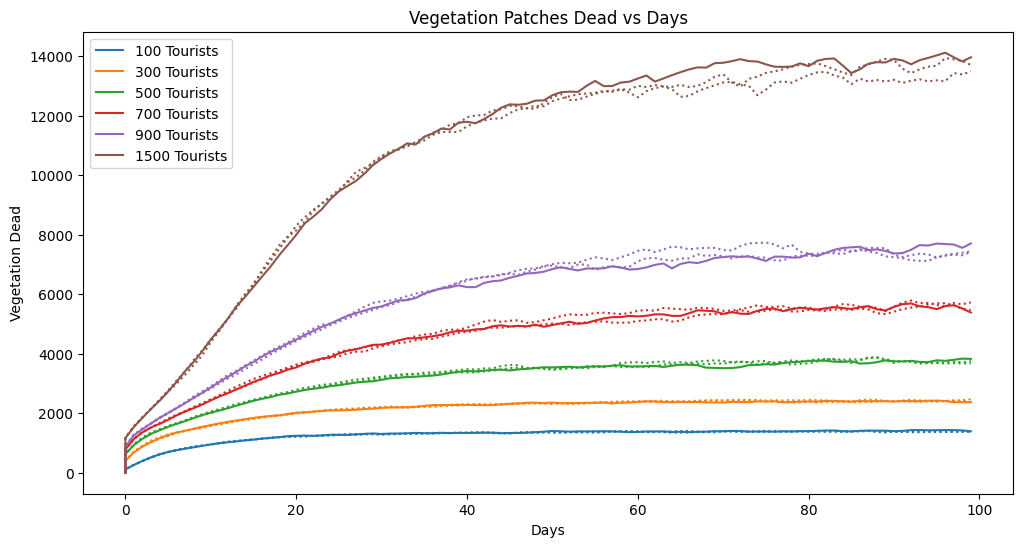

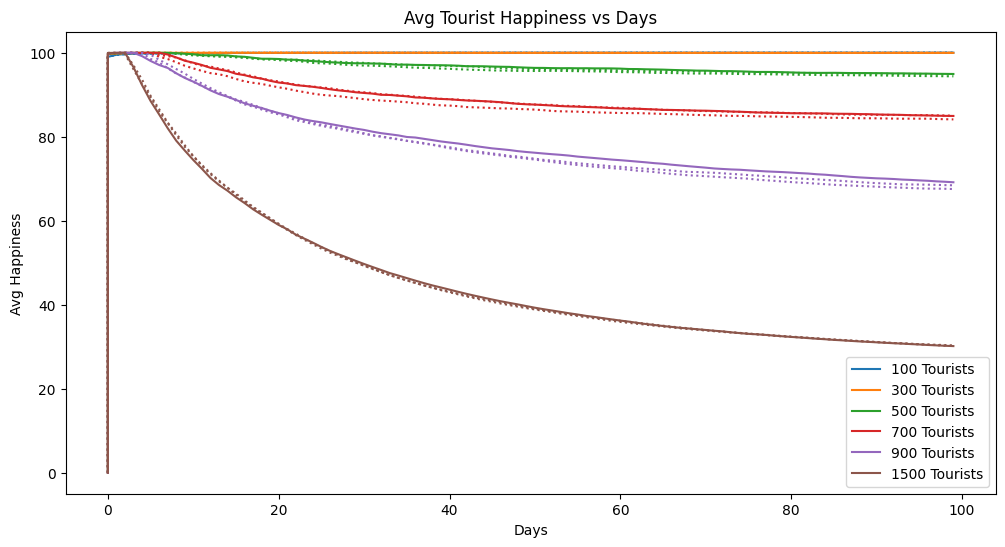

99


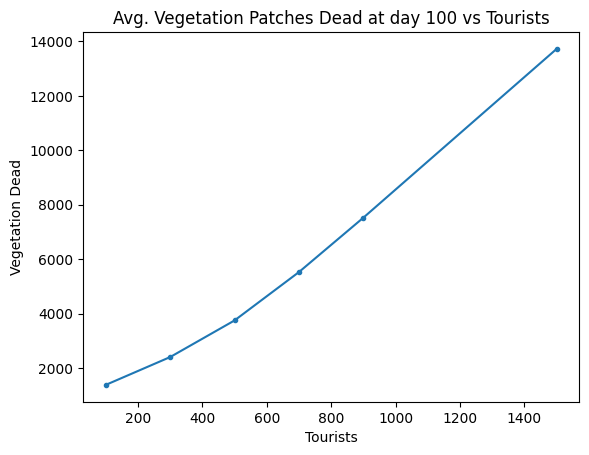

[1404.0, 51.0, 27.666666666666668, 23.333333333333332, 24.333333333333332, 30.666666666666668, 44.666666666666664, 74.33333333333333, 209.0]
[2457.0, 127.33333333333333, 96.33333333333333, 73.33333333333333, 75.66666666666667, 90.0, 124.33333333333333, 242.66666666666666, 815.3333333333334]
[3854.6666666666665, 268.3333333333333, 183.33333333333334, 149.33333333333334, 145.66666666666666, 173.33333333333334, 233.0, 462.3333333333333, 1569.3333333333333]
[5736.666666666667, 479.0, 336.6666666666667, 280.3333333333333, 269.0, 318.6666666666667, 437.3333333333333, 775.3333333333334, 1839.3333333333333]
[7789.0, 550.3333333333334, 384.0, 344.6666666666667, 343.3333333333333, 388.6666666666667, 494.3333333333333, 914.3333333333334, 2521.0]
[14086.333333333334, 764.0, 470.3333333333333, 367.0, 397.6666666666667, 422.3333333333333, 605.3333333333334, 951.6666666666666, 2224.0]


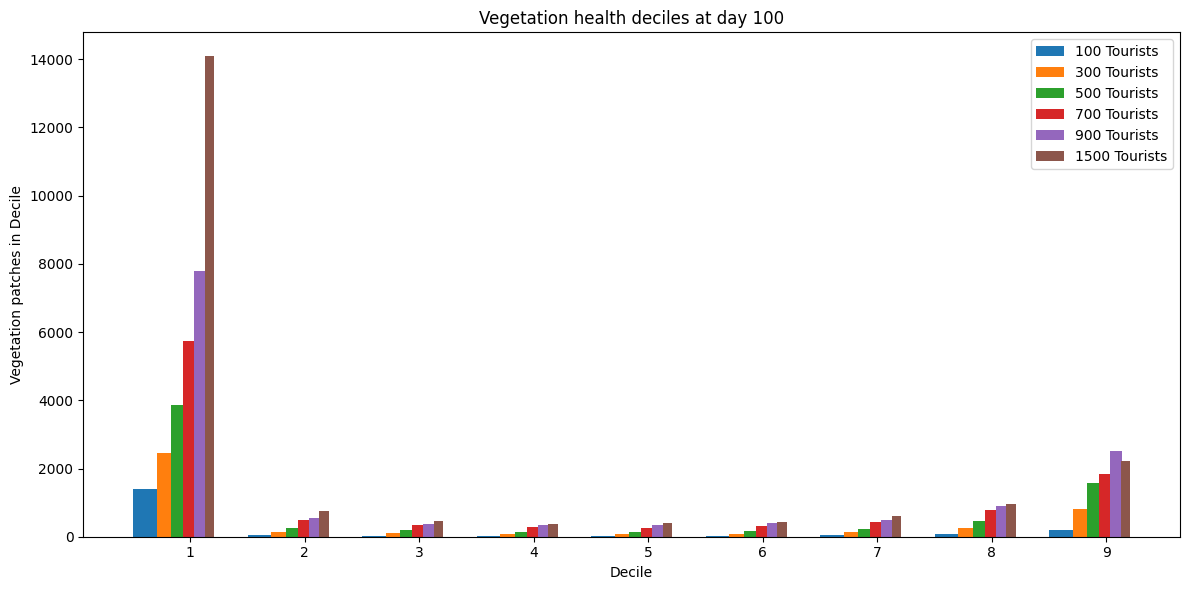

In [132]:
run_plots('cradlemountain experiment-table-100.csv')

In [145]:


def run_plots_shortcutters(file):
    
    data = pd.read_csv(file, header=6)
    
    shortcutter_values = list(set(data['shortcutting-tourists']))
    
    tourist_counts = [1000]
    shortcutter_values.sort()
    print(tourist_counts)
    
        
  
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    last_day = data[data['ticks'] == 49]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(shortcutter_values):
        series = [last_day[last_day['shortcutting-tourists'] == c]['vegetation-decile ' + str(j)].mean() for j in labels]
        print(series)
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/(i+1), label=f"{c}% Shortcutters"))
        
        
    ax.set_title('Vegetation health deciles at day 50 (1000 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    


[1000]
[3994.0, 119.0, 79.0, 64.0, 78.0, 88.0, 114.0, 151.0, 349.0]
[4235.0, 152.0, 94.0, 81.0, 94.0, 100.0, 118.0, 206.0, 605.0]
[4758.0, 230.0, 160.0, 167.0, 206.0, 227.0, 309.0, 652.0, 1515.0]
[7842.0, 571.0, 413.0, 461.0, 444.0, 505.0, 658.0, 995.0, 2407.0]
[12229.0, 672.0, 583.0, 532.0, 559.0, 590.0, 688.0, 1127.0, 2590.0]
[15524.0, 768.0, 592.0, 552.0, 584.0, 623.0, 835.0, 1360.0, 2676.0]


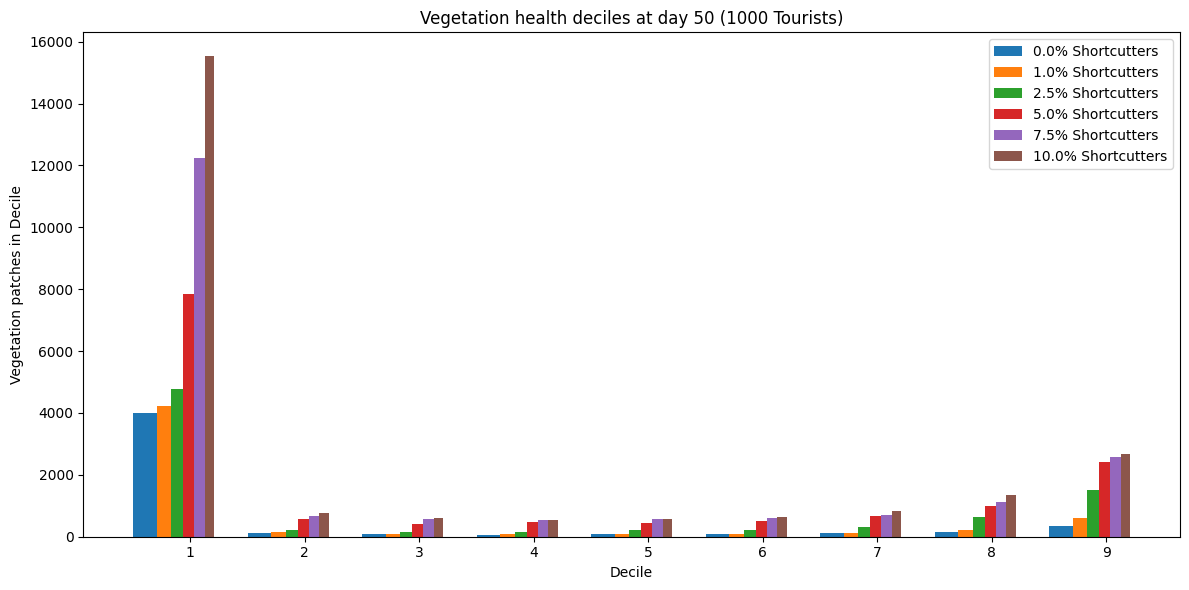

In [146]:
run_plots_shortcutters('cradlemountain experiment-table-100-shortcutters.csv')

In [ ]:


def run_plots_deviations(file):
    
    data = pd.read_csv(file, header=6)
    
    shortcutter_values = list(set(data['shortcutting-tourists']))
    
    tourist_counts = [1000]
    shortcutter_values.sort()
    print(tourist_counts)
    
        
  
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    last_day = data[data['ticks'] == 49]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(shortcutter_values):
        series = [last_day[last_day['shortcutting-tourists'] == c]['vegetation-decile ' + str(j)].mean() for j in labels]
        print(series)
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/(i+1), label=f"{c}% Shortcutters"))
        
        
    ax.set_title('Vegetation health deciles at day 50 (1000 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    
run_plots_deviations('cradlemountain experiment-table-100-deviation.csv')